## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data = pd.read_csv('D:/multiple_linear_regression.csv')
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

## Splitting Data

In [4]:
output_col = 'Target'

x = data.iloc[:,data.columns != output_col]

y = data.loc[:,output_col]

In [5]:
x, y

(     Feature 1  Feature 2  Feature 3
 0        230.1       37.8       69.2
 1         44.5       39.3       45.1
 2         17.2       45.9       69.3
 3        151.5       41.3       58.5
 4        180.8       10.8       58.4
 ..         ...        ...        ...
 195       38.2        3.7       13.8
 196       94.2        4.9        8.1
 197      177.0        9.3        6.4
 198      283.6       42.0       66.2
 199      232.1        8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Target, Length: 200, dtype: float64)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 43)

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

## <font color = 'red'> Linear Regression</font>

### Training

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [9]:
lr.coef_, lr.intercept_

(array([ 0.0459782 ,  0.18092867, -0.00194226]), 3.0777744955280397)

### Prediction

In [10]:
y_pred = lr.predict(x_test)

### Cost

In [11]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, y_pred)

cost

2.2412862530933464

### Plotting

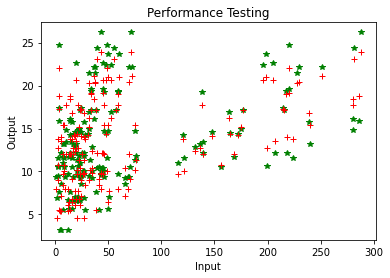

In [12]:
plt.plot(x_test, y_test, '*', color = 'green')
plt.plot(x_test, y_pred, '+', color = 'red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## <font color = 'green'>Assumptions of Linear Regression</font>

### Homoscedasticity

In [13]:
residuals = y_pred - y_test

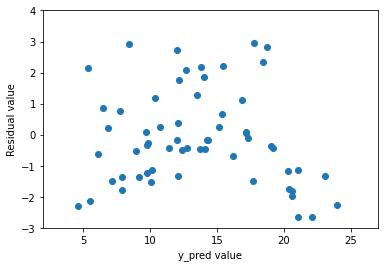

In [14]:
plt.scatter(y_pred, residuals)
plt.xlabel('y_pred value')
plt.ylabel('Residual value')

plt.xlim(2,27)
plt.ylim(-3,4)

plt.show()

### Normality of the Residuals

In [15]:
import seaborn as sns

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Target', ylabel='Density'>

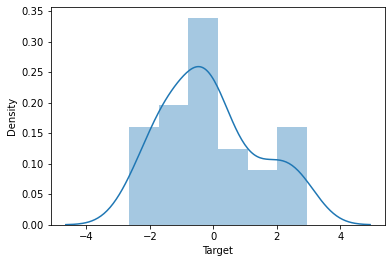

In [16]:
sns.distplot(residuals)

## Ordinary Least Squares

In [18]:
import statsmodels.api as sm

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
data.head()

In [ ]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

In [ ]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
result.params

In [ ]:
print(result.summary())